In [26]:
'''
    挖掘模式，并统计模式数量
'''

import pandas as pd

router_timestamp = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_router_timestamp_.csv')

# 时间段划分间隔
time_windows = 120

iter_num = 0

# 组合（道路偏移）
lane_offset = [132356 ,
               132358 ]
lane_offset_warning = [132355 , 132357]

seq_length_thresh = 1

# 重新赋值成的
lane_offset_uniform_id = 10000
lane_offset_warning_uniform_id = 10001

time_seq = []
new_array_timestamp = []
new_array_event_type = []

# 取出所有的router_id
router_id = router_timestamp.groupby('router_id').head(1)["router_id"].values
router_id.sort()

for index, cur_id in enumerate(router_id):
    # 遍历每一条行程
    tmp_df = router_timestamp[router_timestamp["router_id"] == cur_id]
    for i,r in tmp_df.iterrows():
        # 遍历在每一条行程内的每一个alarm
        cur_time = pd.to_datetime(r['begin_time'])
        cur_event = r['event_type']

        # 重新赋值左偏右偏
        if cur_event in lane_offset:
            cur_event = lane_offset_uniform_id
        elif cur_event in lane_offset_warning:
            cur_event = lane_offset_warning_uniform_id

        if len(new_array_timestamp) == 0:
            # 新序列的第一个
            new_array_timestamp.append(cur_time)
            new_array_event_type.append(cur_event)
        else:
            # 后续是否要加入
            delta_time = cur_time - new_array_timestamp[-1]
            
            if delta_time.total_seconds() < time_windows: 
                
                # 仍在时间段内
                last_event = new_array_event_type[-1]
                if  cur_event != last_event:
                    # 连续的去重
                    if len(time_seq) == 2027:
                        print(cur_event, delta_time.total_seconds(), cur_time, new_array_timestamp[-1])

                    new_array_timestamp.append(cur_time)
                    new_array_event_type.append(cur_event)
            else:
                # 超出时间阈值，成为新的序列
                if len(new_array_event_type) > seq_length_thresh:
                    time_seq.append((cur_id, new_array_event_type.copy()))
                
                new_array_event_type.clear()
                new_array_timestamp.clear()

        iter_num = iter_num + 1

    # if len(new_array_timestamp) > 0:
    #     last_event = new_array_event_type[-1]
    #     if cur_event != last_event:
    #         # 连续的去重
    #         new_array_timestamp.append(cur_time)
    #         new_array_event_type.append(cur_event)
    if len(new_array_timestamp) > 0:
        time_seq.append((cur_id, new_array_event_type.copy()))
        new_array_event_type.clear()
        new_array_timestamp.clear()
    
# print(time_seq[2027])
# print(tmp_df)

132360 4.0 2021-07-02 13:10:23 2021-07-02 13:10:19
10000 5.0 2021-07-02 13:10:28 2021-07-02 13:10:23
132360 17.0 2021-07-02 13:10:45 2021-07-02 13:10:28
10000 57.0 2021-07-02 13:11:42 2021-07-02 13:10:45
132360 4.0 2021-07-02 13:11:46 2021-07-02 13:11:42
10000 51.0 2021-07-02 13:12:37 2021-07-02 13:11:46
132360 56.0 2021-07-02 13:13:33 2021-07-02 13:12:37
10000 4.0 2021-07-02 13:13:37 2021-07-02 13:13:33
132359 15.0 2021-07-02 13:13:52 2021-07-02 13:13:37
10001 3.0 2021-07-02 13:13:55 2021-07-02 13:13:52
10000 40.0 2021-07-02 13:14:35 2021-07-02 13:13:55
132354 13.0 2021-07-02 13:14:48 2021-07-02 13:14:35
132360 3.0 2021-07-02 13:14:51 2021-07-02 13:14:48
10000 7.0 2021-07-02 13:14:58 2021-07-02 13:14:51
132360 0.0 2021-07-02 13:14:58 2021-07-02 13:14:58
10000 30.0 2021-07-02 13:15:28 2021-07-02 13:14:58
132360 57.0 2021-07-02 13:16:25 2021-07-02 13:15:28
10000 71.0 2021-07-02 13:17:36 2021-07-02 13:16:25
132359 100.0 2021-07-02 13:19:16 2021-07-02 13:17:36
10000 83.0 2021-07-02 13:20:

In [28]:
print(len(time_seq), len(router_id))

2060 352


In [20]:
print(time_seq[2027])

(8939, [10000, 132360, 10000, 132360, 10000, 132360, 10000, 132360, 10000, 132359, 10001, 10000, 132354, 132360, 10000, 132360, 10000, 132360, 10000, 132359, 10000, 132360, 10000, 132360])


In [11]:
risk_type_df = pd.read_csv('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\t_alarm_basic_config' + '.csv')


def return_type_name(type_id):
    '''
    @breif id->name
    '''
    if type_id == lane_offset_uniform_id:
        return "车道偏离" 
    elif type_id == lane_offset_warning_uniform_id:
        return "车道偏离预警" 
    else: 
        return risk_type_df[risk_type_df['event_type'] == type_id]['\"name\"'].values[0]


def return_type_id(type_name):
    '''
    @breif name->id
    '''
    if type_name == "车道偏离":
        return lane_offset_uniform_id
    elif type_name == "车道偏离预警":
        return lane_offset_warning_uniform_id
    else: 
        return risk_type_df[risk_type_df['\"name\"'] == type_name]['event_type'].values[0]


print(return_type_name(132355))
print(return_type_id("车道偏离预警"))

车道偏离（左）预警
10001


In [12]:
from prefixspan import PrefixSpan

result_seq = []
def cover(patt, matches):
    '''
    @brief 序列挖掘筛选函数
    '''
    is_same = False # True
    # 序列长度
    if len(patt) > 0:
        first = ""
        for i, per_patt in enumerate(patt):
        # 保证不是单个动作重复的序列，遍历每一个
            if i == 0:
                continue
            else:
                if patt[i - 1] == patt[i]:
                    is_same = True
                    break

    if is_same == False and len(matches) > 3:
        # 匹配阈值 len(matches) > 3
        patt_with_name = []
        for i in patt:
            patt_with_name.append(return_type_name(i))
        # 将id换成name
        result_seq.append((len(matches), patt_with_name))


time_seq_pure = []
for i in time_seq:
    time_seq_pure.append(i[1])

ps = PrefixSpan(time_seq_pure)

ps.topk(1000, callback=cover)

In [13]:
import functools

def my_compare(x,y):
    len_x = len(x[1])
    len_y = len(y[1])

    if len_x < len_y:
        return -1
    elif len_x == len_y:
        if x[0] > y[0]:
            return -1
        else:
            return 1
    else: 
        return 1
 
result_seq = sorted(result_seq,key=functools.cmp_to_key(my_compare))

In [14]:
import numpy as np
def diff_array(new_seq, old_seq):
    # 输出两个集合的差集
    new_seq = np.array(new_seq[1])
    old_seq = np.array(old_seq[1])

    return list(set(new_seq).difference(set(old_seq)))

def is_covered(new_seq, old_seq):
    # 判断两序列是否有包含关系
    new_seq = np.array(new_seq[1])
    old_seq = np.array(old_seq[1])

    new_ptr = 0
    old_ptr = 0

    while new_ptr < len(new_seq) and old_ptr < len(old_seq):
        if new_seq[new_ptr] == old_seq[old_ptr]:
            new_ptr += 1
            old_ptr += 1
        else:
            new_ptr += 1
    
    return (old_ptr == len(old_seq))

filter_res = []
# 近似认为 new_seq 长度比 old_seq 长
for new_seq in result_seq:
    
    if len(filter_res) == 0:
        filter_res.append(new_seq)
    else:
        is_covered_flag = False
        for old_seq in filter_res:
            # 旧的内容是否能够完全覆盖（但是需要仍然有序！不能直接做差集！）
            diff_set = diff_array(new_seq, old_seq)
            # 子序列
            is_covered_flag = is_covered(new_seq, old_seq)

            if is_covered_flag and len(diff_set) == 0: # 
                # 信息没增加且完全被之前的子序列包含
                is_covered_flag = True
                break

        if is_covered_flag == False:
            filter_res.append(new_seq)


def my_compare(x,y):
    if x[0] > y[0]:
        return -1
    else:
        return 1
 
#分别使用sorted和list.sort
filter_res = sorted(filter_res,key=functools.cmp_to_key(my_compare))


filter_res_id = []
print(len(filter_res))
for i in filter_res:
    per_arr = []
    for j in i[1]:
        per_arr.append(return_type_id(j))
    filter_res_id.append(per_arr)
    # print(i)
    
# print(filter_res)



119


In [15]:
# # 匹配模板 filter_res filter_res_id
# # time_seq
from matplotlib.font_manager import FontProperties 
from matplotlib import pyplot as plt

font = FontProperties(fname=r"C:\\Windows\\Fonts\\simsun.ttc", size=15) 

plt.figure(figsize=(20,5))

arr = []

filter_res_str = []
for index, i in enumerate(filter_res):
    cur_str = ""
    for j in i[1]:
        cur_str += str(j) + ","
    filter_res_str.append(cur_str)

filter_res_id_str = []
for index, i in enumerate(filter_res_id):
    cur_str = ""
    for j in i:
        cur_str += str(j) + ","
    filter_res_id_str.append(cur_str)

time_seq_str = []
for index, i in enumerate(time_seq):
    cur_str = ""
    for j in i[1]:
        cur_str += str(j) + ","
    time_seq_str.append(cur_str)

# 遍历每种alarm event
data = {}
for i in filter_res_str:
    data[i] = []

<Figure size 1440x360 with 0 Axes>

In [16]:
def seq_find(real_seq, sub_seq):
    '''
        @brief 匹配序列，查看是否在子序列中
        @params real_seq（目标序列）sub_seq（序列模板）
    '''
    cnt = 0
    is_find = True
    if len(real_seq) < len(sub_seq):
        is_find = False
    else:
        
        cur_pos = 0
        while(1):
            # 不断前进
            cur_pos = seq_find_iter(cur_pos, 0, real_seq, sub_seq)

            if cur_pos == -1:
                break
            cnt += 1
    return cnt

def seq_find_iter(i, j, real_seq, sub_seq):
    '''
        @brief 匹配序列，查看是否在子序列中
        @params i（目标序列当前指针）, j(序列模板当前指针),  real_seq（目标序列）sub_seq（序列模板）
    '''
    n = len(real_seq)
    m = len(sub_seq)
    real_ptr = i
    sub_ptr = j
    while(m - j <= n - i):
        # real剩下的比sub还要少
        if j > m - 1:
            # print("ok")
            return i
        if real_seq[i] == sub_seq[j]:
            # 匹配成功共同进一
            i += 1
            j += 1
        else:
            i += 1

    return -1

print(seq_find("babgbagbbbbaaaaagggg", "bag"))



3


2027 10000,132360,10000,132360,10000,132360,10000,132360,10000,132359,10001,10000,132354,132360,10000,132360,10000,132360,10000,132359,10000,132360,10000,132360,
             车道偏离,        车距过近,      车道偏离预警,   车距过近,车道偏离,   车道偏离,车距过近,  \
count  3670.000000  2346.000000  3304.000000  1690.000000  1530.000000   
mean      1.621253     1.499574     1.472155     1.436686     1.440523   
std       1.012264     0.973530     0.954845     0.894601     0.937932   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       2.000000     2.000000     2.000000     2.000000     2.000000   
max      11.000000    10.000000    12.000000     8.000000     9.000000   

       车道偏离预警,车道偏离,  车道偏离,车道偏离预警,     车距过近预警,  车距过近预警,车道偏离,       前向碰撞,  ...  \
count   1920.000000   1318.000000  766.000000    348.000000  324.000000  ...   
mean       

C:\Users\zhengqiushi\AppData\Local\Temp/ipykernel_15636/3362136005.py:26: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_final_data.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task5_stastics.xls')


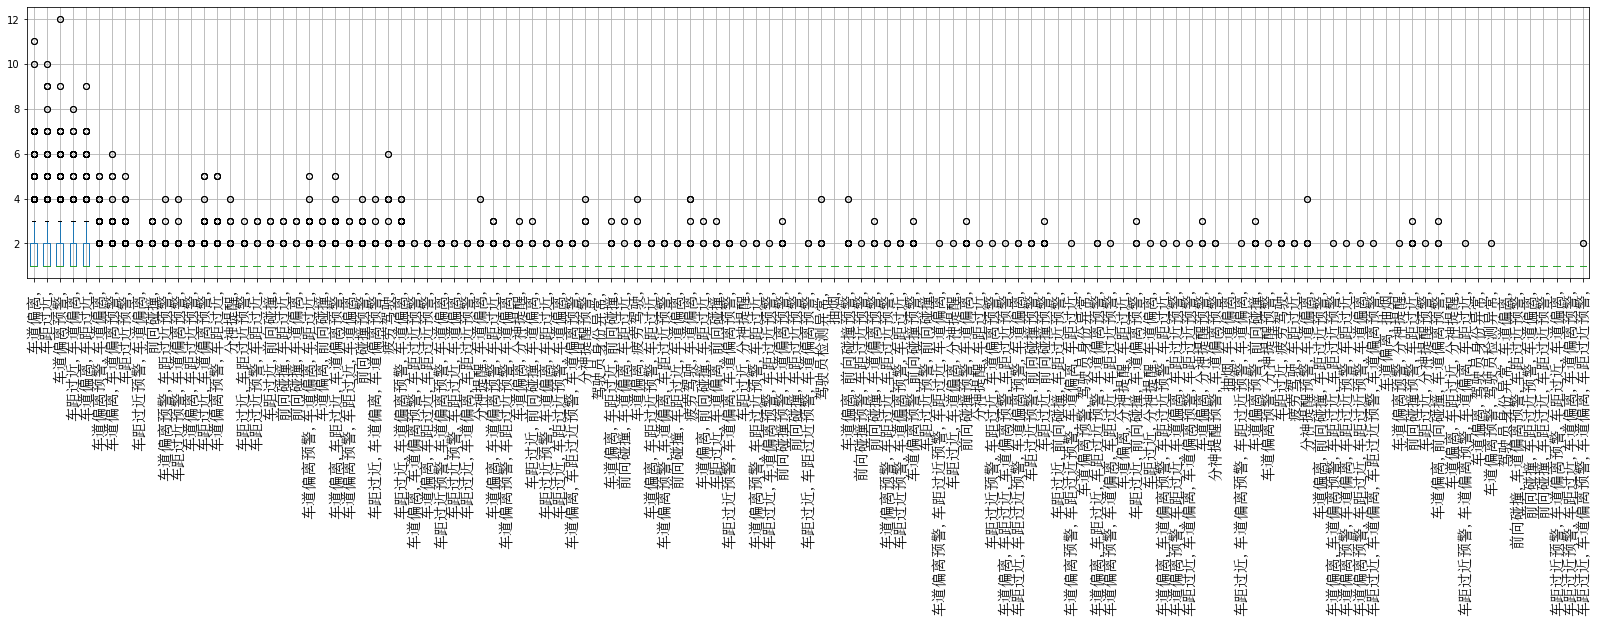

In [18]:
# 一旦出现，出现的频率
# 匹配方法不太科学
for index, record in enumerate(time_seq_str):
    for patt_index, patt in enumerate(filter_res_id_str):
        data[filter_res_str[patt_index]].append(seq_find(record, patt)) # record.count(patt))

filter_data = {}
for patt_index, patt in enumerate(filter_res_id_str):
    patt_str = filter_res_str[patt_index]
    if len(data[patt_str]) > 0:
        filter_data[patt_str] = data[patt_str]
# print(data)

# 补齐
df_final_data = pd.DataFrame.from_dict(filter_data, orient='index')
df_final_data = df_final_data[df_final_data != 0]

df_final_data = df_final_data.T

print(df_final_data.describe())

df_final_data.describe().T.to_excel('C:\\Users\\zhengqiushi\\Desktop\\hik\\21-08-13\\数据\\task5_stastics.xls')
plt.figure(figsize=(28,5))
# 解决标注乱码的问题
ax = df_final_data.boxplot(rot='90')
for label in ax.get_xticklabels() : 
    label.set_fontproperties(font) 